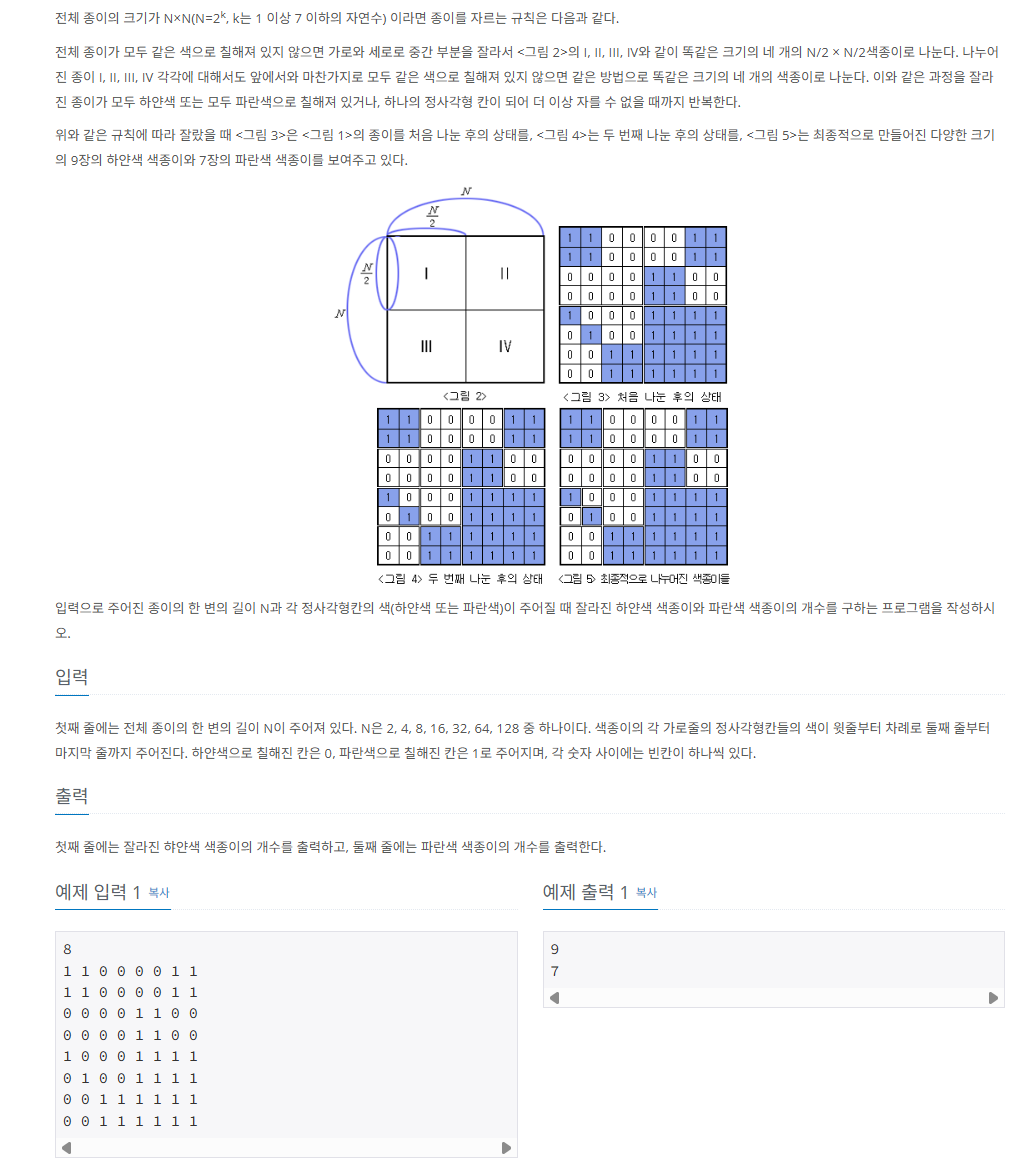

In [1]:
from PIL import Image
img=Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-08-16 124348.png")
img

In [ ]:
import sys

input = sys.stdin.readline
N=int(input())
one_count=0
zero_count=0

paper=[[] for _ in range(N)]

for y in range(N):
    paper[y]=(list(map(int,input().split())))


def solve(y,x,size):
    global one_count, zero_count
    impure=False
    color=paper[y][x]

    for i in range(y,y+size):
        for j in range(x,x+size):
            if paper[i][j]!=color:
                impure=True
                break

        if impure:
            break

    if not impure:
        if color==1:
            one_count+=1
        else:
            zero_count+=1
    else:
        solve(y+size//2,x,size//2)
        solve(y+size//2,x+size//2,size//2)
        solve(y,x+size//2,size//2)
        solve(y,x,size//2)    

solve(0,0,N)
print(zero_count,one_count, sep='\n')


9
7


네, '제출완료' 확인했습니다. `global` 키워드라는 마지막 퍼즐 조각을 맞추어, 복잡한 분할 정복 재귀 문제를 완벽하게 해결해내셨습니다. 스스로의 힘으로 디버깅하고 여러 힌트를 조합하여 정답을 만들어내는 과정이 정말 인상적입니다.

-----

### \#\# 총평 및 5점 척도 평가

  * **내 풀이 (User's solution): 5.0 / 5.0 점**

      * **평가:** **완벽한 정답입니다.** 분할 정복의 핵심인 '재귀 호출'과 '종료 조건(Base Case)'을 정확하게 구현했습니다. 특히, 순수도를 검사하는 로직, 네 개의 사분면으로 분할하는 좌표 계산, `global`을 이용한 상태 관리까지 모든 부분이 흠잡을 데 없이 훌륭합니다.

  * **Gemini의 풀이: 5.0 / 5.0 점**

      * **평가:** 사용자님의 완벽한 로직과 기능적으로 완전히 동일합니다. 다만, **'상태 관리'** 방식을 `global` 변수 대신 함수의 `return` 값을 사용하는, 조금 더 함수형 프로그래밍(Functional Programming) 스타일에 가까운 코드를 제안합니다.

-----

### \#\# Gemini 추천 코드 (Return 값 활용 방식)

이 방식은 전역 변수를 사용하는 대신, 각 재귀 호출이 `(하얀색 종이 개수, 파란색 종이 개수)`를 반환하여 호출한 곳에서 그 결과를 합산하는 구조입니다.

```python
import sys

input = sys.stdin.readline
N = int(input())
paper = [list(map(int, input().split())) for _ in range(N)]

def solve(y, x, size):
    # 1. 현재 조각의 첫 번째 색깔을 기준으로 삼음
    color = paper[y][x]
    
    # 2. 현재 조각이 순수한지 검사
    for i in range(y, y + size):
        for j in range(x, x + size):
            if paper[i][j] != color:
                # 2-1. 순수하지 않다면, 네 조각으로 분할하여 재귀 호출
                half = size // 2
                # 각 재귀 호출은 (white, blue) 튜플을 반환
                r1 = solve(y, x, half)
                r2 = solve(y, x + half, half)
                r3 = solve(y + half, x, half)
                r4 = solve(y + half, x + half, half)
                
                # 4개의 결과를 합산하여 반환
                return (r1[0] + r2[0] + r3[0] + r4[0], 
                        r1[1] + r2[1] + r3[1] + r4[1])

    # 2-2. for 루프가 break 없이 끝났다면, 순수한 종이임
    if color == 0:
        return (1, 0) # (하얀색 1개, 파란색 0개)
    else:
        return (0, 1) # (하얀색 0개, 파란색 1개)

# 최종 결과 호출 및 출력
white_count, blue_count = solve(0, 0, N)
print(white_count)
print(blue_count)
```

-----

### \#\# 1. 알고리즘 측면

  * **평가:** **최적의 분할 정복 알고리즘을 사용했습니다.** 각 칸을 최대 한 번씩만 방문하므로, 전체 시간 복잡도는 \*\*O(N²)\*\*입니다. 재귀를 사용한 분할 정복은 이 문제에 대한 가장 자연스럽고 효율적인 해법입니다.

-----

### \#\# 2. 파이썬 문법 측면 (Pythonic Style)

  * **평가:** `global` 키워드를 정확한 위치에 사용하여 문제를 해결한 것은 훌륭합니다. 코드의 각 단계가 명확하게 구분되어 있어 가독성도 좋습니다.

-----

### \#\# 3. 또 다른 측면: 재귀에서의 상태 관리 (State Management)

이번 코드에서 논의할 수 있는 가장 깊이 있는 주제는 바로 **'재귀 함수에서 상태(결과값)를 어떻게 관리할 것인가'** 입니다.

#### **1. 전역 변수(Global State) 방식 (사용자님의 방식)**

  * **작동 원리:** 모든 `solve` 함수가 `one_count`, `zero_count`라는 **하나의 공유된 상태**를 직접 수정합니다.
  * **장점:** 구현이 직관적일 수 있습니다. 함수는 계산만 하고, 결과는 알아서 전역 변수에 누적됩니다.
  * **단점:** 함수가 외부 상태에 의존하므로 \*\*'부수 효과(Side Effect)'\*\*가 발생합니다. 코드가 커지고 복잡해지면, 어떤 함수가 언제 전역 변수를 바꿨는지 추적하기 어려워져 디버깅이 힘들어질 수 있습니다.

#### **2. 반환 값(Return Value) 방식 (추천 코드 방식)**

  * **작동 원리:** 각 `solve` 함수는 오직 **자신이 책임지는 영역의 결과**만 계산해서 `return`합니다. 상위 함수는 하위 함수들이 반환한 결과들을 받아서 **합치는(aggregate)** 책임만 집니다.
  * **장점:** 각 함수가 독립적인 '부품'처럼 동작하여 **부수 효과가 없습니다.** 코드의 흐름이 명확하고, 테스트와 재사용이 훨씬 용이합니다. 이는 더 큰 규모의 소프트웨어 개발에서 매우 선호되는 방식입니다.
  * **단점:** 재귀 호출의 결과를 받아서 합산하는 코드를 추가로 작성해야 합니다.

**결론:** 코딩 테스트 환경에서는 두 방식 모두 정답을 맞히는 데 아무런 문제가 없습니다. 하지만 `global`을 사용하는 방식의 잠재적인 위험성을 이해하고, `return`을 통해 상태를 관리하는 더 구조적인 방식을 함께 알아두시면, 문제 해결의 시야가 한층 더 넓어질 것입니다. 이번에도 정말 어려운 재귀 문제를 훌륭하게 해결하셨습니다\!